<b style="font-size: 40px;">    Complex NN Aplication</b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')


In [2]:
ptbdb_normal = pd.read_csv("C:/Users/dhruv/Downloads/archive (2)/ptbdb_normal.csv", header=None, error_bad_lines=False)
ptbdb_abnormal = pd.read_csv("C:/Users/dhruv/Downloads/archive (2)/ptbdb_abnormal.csv", header=None, error_bad_lines=False)
mitbih_train = pd.read_csv("C:/Users/dhruv/Downloads/archive (2)/mitbih_train.csv", header=None, error_bad_lines=False)

In [3]:
mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)
print(len(ptbdb_normal))
print(len(ptbdb_abnormal))


0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
4046
10506


In [4]:
import matplotlib.pyplot as plt

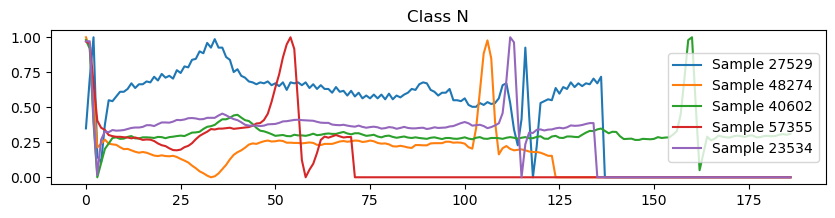

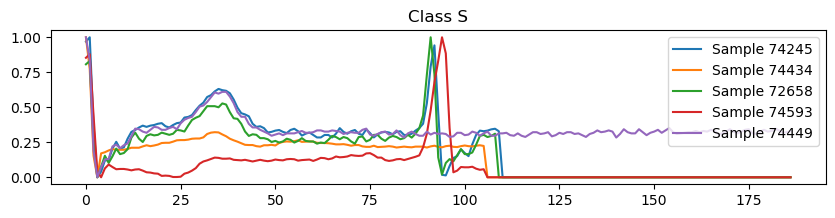

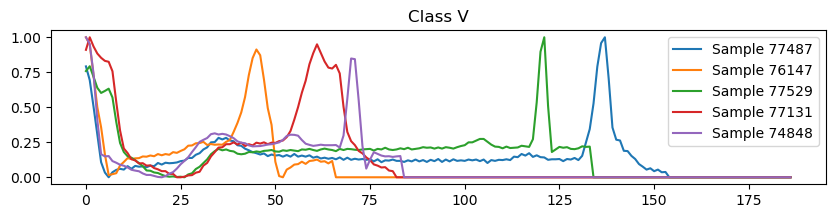

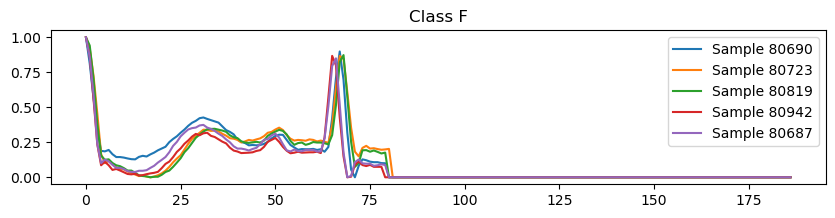

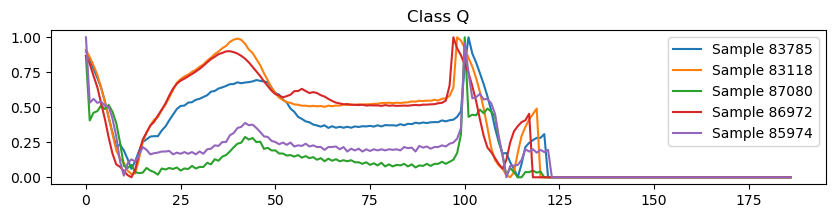

In [5]:
# Class labels
class_labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

for class_id, label in class_labels.items():
    plt.figure(figsize=(10, 2))
    class_data = mitbih_train[mitbih_train[187] == class_id]
    samples = class_data.sample(n=5)

    for i, row in samples.iterrows():
        plt.plot(row[:-1], label=f'Sample {i+1}')
    
    plt.title(f'Class {label}')
    plt.legend()
    plt.show()

In [6]:
#mitbih_train[187] = mitbih_train[187].apply(lambda x: 1 if x > 0 else 0)
combined_data_stage_1 = pd.concat([ptbdb_normal, ptbdb_abnormal], ignore_index=True)

In [7]:
scaler = MinMaxScaler()

In [8]:
X_stage_1 = combined_data_stage_1.iloc[:, :-1]
y_stage_1 = combined_data_stage_1.iloc[:, -1]
X_scaled_stage_1 = scaler.fit_transform(X_stage_1)
X_reshaped_stage_1 = X_scaled_stage_1.reshape((X_scaled_stage_1.shape[0], X_scaled_stage_1.shape[1], 1))

X_train, X_temp, y_train, y_temp = train_test_split(X_reshaped_stage_1, y_stage_1, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [12]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[early_stopping, model_checkpoint])
model.summary()

Epoch 1/25
273/273 [==============================] - 7s 21ms/step - loss: 0.4488 - accuracy: 0.7701 - val_loss: 0.3934 - val_accuracy: 0.8206
Epoch 2/25
273/273 [==============================] - 6s 23ms/step - loss: 0.3779 - accuracy: 0.8134 - val_loss: 0.3597 - val_accuracy: 0.8416
Epoch 3/25
273/273 [==============================] - 2s 9ms/step - loss: 0.3533 - accuracy: 0.8405 - val_loss: 0.3475 - val_accuracy: 0.8557
Epoch 4/25
273/273 [==============================] - 6s 22ms/step - loss: 0.3298 - accuracy: 0.8543 - val_loss: 0.3404 - val_accuracy: 0.8351
Epoch 5/25
273/273 [==============================] - 5s 20ms/step - loss: 0.3113 - accuracy: 0.8707 - val_loss: 0.2938 - val_accuracy: 0.8821
Epoch 6/25
273/273 [==============================] - 4s 15ms/step - loss: 0.2956 - accuracy: 0.8807 - val_loss: 0.2720 - val_accuracy: 0.8935
Epoch 7/25
273/273 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.8931 - val_loss: 0.2539 - val_accuracy: 0.9079
E

In [13]:
# Evaluating test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Tsting randomly
import numpy as np

num_samples = 10
indices = np.random.choice(range(len(X_test)), num_samples, replace=False)
sample_test_data = X_test[indices]
sample_test_labels = y_test.iloc[indices]

# Predicting
predictions = model.predict(sample_test_data)
predicted_labels = (predictions > 0.5).astype(int)

for i, (true, pred) in enumerate(zip(sample_test_labels, predicted_labels)):
    print(f"Sample {i+1}: True Label: {true}, Predicted Label: {pred[0]}")


91/91 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9615
Test Accuracy: 96.15%
1/1 [==============================] - 0s 130ms/step
Sample 1: True Label: 0.0, Predicted Label: 0
Sample 2: True Label: 1.0, Predicted Label: 1
Sample 3: True Label: 1.0, Predicted Label: 1
Sample 4: True Label: 0.0, Predicted Label: 0
Sample 5: True Label: 1.0, Predicted Label: 1
Sample 6: True Label: 0.0, Predicted Label: 0
Sample 7: True Label: 1.0, Predicted Label: 1
Sample 8: True Label: 1.0, Predicted Label: 1
Sample 9: True Label: 1.0, Predicted Label: 1
Sample 10: True Label: 0.0, Predicted Label: 0


In [14]:
# lstm and arima 

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
data = pd.read_csv('C:/Users/dhruv/Downloads/archive (2)/mitbih_train.csv', header=None)

In [17]:
filtered_data = data[data[187].isin([1, 2, 3, 4])] 

In [18]:
X_2 = filtered_data.iloc[:, :-1]
y_2 = filtered_data.iloc[:, -1]

In [19]:
scaler_2 = MinMaxScaler()
X_scaled_2 = scaler_2.fit_transform(X_2)

# Reshapeing data
X_reshaped_2 = X_scaled_2.reshape((X_scaled_2.shape[0], X_scaled_2.shape[1], 1))

y_2 = y_2 - 1
y_categorical_2 = to_categorical(y_2, num_classes=4)

In [20]:
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X_reshaped_2, y_categorical_2, test_size=0.4, random_state=42)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, random_state=42)

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input

In [22]:
new_input = Input(shape=(X_train_2.shape[1], 1))

x = new_input 
for layer in model.layers[:-1]:  #reusing layers of model Excluding the last layer
    x = layer(x)

In [23]:
#model 2 defining
x = Dense(100, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x) 

In [24]:
model_2 = Model(inputs=new_input, outputs=output)

#freezeing layers of Stage 1
for layer in model.layers:
    layer.trainable = False

#Compilation
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 183, 32)           192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 91, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2912)              0         
                                                                 
 dense (Dense)               (None, 50)                145650    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                             

In [25]:
#Training
model_2.fit(X_train_2, y_train_2, validation_data=(X_val_2, y_val_2), epochs=50)

Epoch 1/50
283/283 [==============================] - 1s 3ms/step - loss: 1.1101 - accuracy: 0.5458 - val_loss: 0.8014 - val_accuracy: 0.7275
Epoch 2/50
283/283 [==============================] - 1s 2ms/step - loss: 0.8827 - accuracy: 0.6384 - val_loss: 0.7440 - val_accuracy: 0.7471
Epoch 3/50
283/283 [==============================] - 1s 2ms/step - loss: 0.8263 - accuracy: 0.6668 - val_loss: 0.7110 - val_accuracy: 0.7759
Epoch 4/50
283/283 [==============================] - 1s 2ms/step - loss: 0.7974 - accuracy: 0.6887 - val_loss: 0.6806 - val_accuracy: 0.7948
Epoch 5/50
283/283 [==============================] - 1s 2ms/step - loss: 0.7625 - accuracy: 0.7011 - val_loss: 0.6802 - val_accuracy: 0.7819
Epoch 6/50
283/283 [==============================] - 1s 2ms/step - loss: 0.7575 - accuracy: 0.7079 - val_loss: 0.6695 - val_accuracy: 0.7958
Epoch 7/50
283/283 [==============================] - 1s 2ms/step - loss: 0.7422 - accuracy: 0.7085 - val_loss: 0.6646 - val_accuracy: 0.7965
Epoch 

<b style="font-size: 40px;">    CNN Aplication</b>


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

# Load datasets
mitbih_train = pd.read_csv("C:/Users/dhruv/Downloads/ecgdata/mitbih_train.csv", header=None, error_bad_lines=False)
mitbih_test = pd.read_csv("C:/Users/dhruv/Downloads/ecgdata/mitbih_test.csv", header=None, error_bad_lines=False)

In [2]:
# Separate features and labels
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

In [3]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [5]:
# Convert labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [6]:
# CNN model architecture
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

In [7]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 185, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 92, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5888)              0         
                                                                 
 dense (Dense)               (None, 100)               588900    
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 589,661
Trainable params: 589,661
Non-trainable params: 0
__________________________________________________

In [8]:
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
1232/1232 [==============================] - 40s 32ms/step - loss: 0.1296 - accuracy: 0.9643 - val_loss: 10.5568 - val_accuracy: 0.1495
Epoch 2/10
1232/1232 [==============================] - 38s 30ms/step - loss: 0.0805 - accuracy: 0.9778 - val_loss: 11.1777 - val_accuracy: 0.1707
Epoch 3/10
1232/1232 [==============================] - 38s 31ms/step - loss: 0.0674 - accuracy: 0.9808 - val_loss: 10.5156 - val_accuracy: 0.1696
Epoch 4/10
1232/1232 [==============================] - 39s 32ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 11.4725 - val_accuracy: 0.1721
Epoch 5/10
1232/1232 [==============================] - 37s 30ms/step - loss: 0.0513 - accuracy: 0.9855 - val_loss: 14.5223 - val_accuracy: 0.1785
Epoch 6/10
1232/1232 [==============================] - 39s 31ms/step - loss: 0.0462 - accuracy: 0.9864 - val_loss: 14.4938 - val_accuracy: 0.1831
Epoch 7/10
1232/1232 [==============================] - 38s 31ms/step - loss: 0.0422 - accuracy: 0.9874 - val_loss: 15

In [9]:
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {loss_cnn}, Test Accuracy: {accuracy_cnn}")

685/685 [==============================] - 3s 4ms/step - loss: 1.8565 - accuracy: 0.9029
Test Loss: 1.856476902961731, Test Accuracy: 0.9028869271278381


<b style="font-size: 40px;">    LSTM Aplication</b>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

# Load the datasets
mitbih_train = pd.read_csv("C:/Users/dhruv/Downloads/ecgdata/mitbih_train.csv", header=None, error_bad_lines=False)
mitbih_test = pd.read_csv("C:/Users/dhruv/Downloads/ecgdata/mitbih_test.csv", header=None, error_bad_lines=False)

# Combine train and test for full dataset (if needed)
# df = pd.concat([mitbih_train, mitbih_test])

# Separate features and labels
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values


In [12]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM layer
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [13]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Model architecture
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 187, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 187, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 5)                 255       
                                                                 
Total params: 73,805
Trainable params: 73,805
Non-trai

In [15]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
1232/1232 [==============================] - 415s 334ms/step - loss: 0.3377 - accuracy: 0.9186 - val_loss: 9.1607 - val_accuracy: 0.0000e+00
Epoch 2/5
1232/1232 [==============================] - 410s 333ms/step - loss: 0.3242 - accuracy: 0.9198 - val_loss: 9.7661 - val_accuracy: 0.0081
Epoch 3/5
1232/1232 [==============================] - 413s 335ms/step - loss: 0.3033 - accuracy: 0.9205 - val_loss: 9.2897 - val_accuracy: 0.0010
Epoch 4/5
1232/1232 [==============================] - 417s 338ms/step - loss: 0.2905 - accuracy: 0.9213 - val_loss: 8.5920 - val_accuracy: 0.0066
Epoch 5/5
1232/1232 [==============================] - 403s 327ms/step - loss: 0.2618 - accuracy: 0.9212 - val_loss: 9.0206 - val_accuracy: 0.0102


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


685/685 [==============================] - 56s 82ms/step - loss: 1.1277 - accuracy: 0.8309
Test Loss: 1.127736210823059, Test Accuracy: 0.8309428095817566
